# The Lotka-Volterra model
This model is a python translation of the LV_pz model proposed in Glover et al. (2011), Sec. 9.3

You will need to make sure the required modules below are installed in your python environment

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

This is the function containing the right hand side of the ODE system

In [2]:
def LV_pz(x,t,p):
    X1,X2 = x
    p1,p2,p3,p4 = p
    dX1dt = X1 * (p1 - p2*X2)
    dX2dt = X2 * (p3*p2*X1 - p4)
    return np.array([dX1dt,dX2dt])

## Parameters and initial conditions

In [17]:
# The parameters
p = np.array([0.1,0.4,0.2,0.05])
X1_0 = 0.8
X2_0 = 0.171
x0 = np.array([X1_0,X2_0])

## Time axis

In [18]:
# time units are days
Tstart = 0.
Tend = 400.
step = 0.1
t = np.arange(Tstart,Tend,step)

## Integration using the scipy ODE solver

In [19]:
# note that the extra argument containing the parameter "args" must be a tuple
y = odeint(LV_pz, x0, t, args=(p,))

## Plot Fig. 9.3a

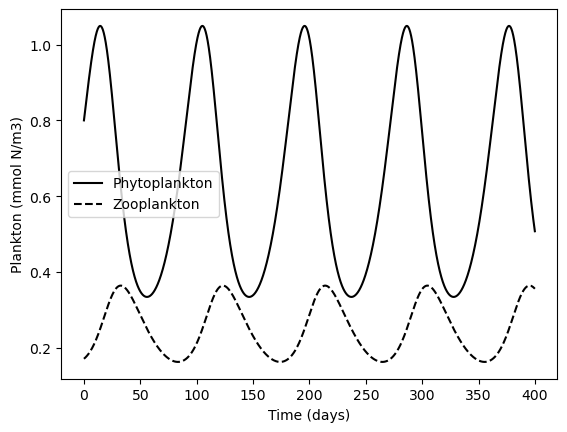

In [20]:
plt.plot(t,y[:,0],'k-',label='Phytoplankton')
plt.plot(t,y[:,1],'k--',label='Zooplankton')
plt.xlabel('Time (days)')
plt.ylabel('Plankton (mmol N/m3)')
plt.legend()
plt.show()

# Exercise 3
1. Write the code to plot Fig. 9.3b, the trajectory in the phase space

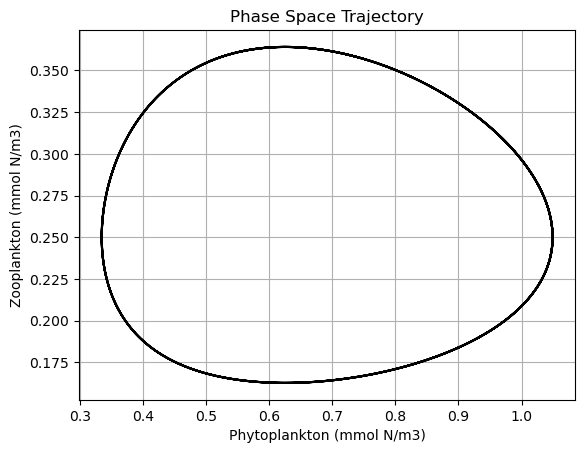

In [21]:
plt.plot(y[:, 0], y[:, 1], 'k-')
plt.xlabel('Phytoplankton (mmol N/m3)')
plt.ylabel('Zooplankton (mmol N/m3)')
plt.title('Phase Space Trajectory')
plt.grid(True)
plt.show()

2. Set the parameter p3=1 and compare how different the trajectory is in the phase space

When compared to the phase space trajectory (PST) when P3 = 0.2, the PST has sharper boundaries as compared to the original PST.

3. Write the code to compute the solution of the L-V model using the initial conditions given in the caption of Fig. 9.4 and plot the results


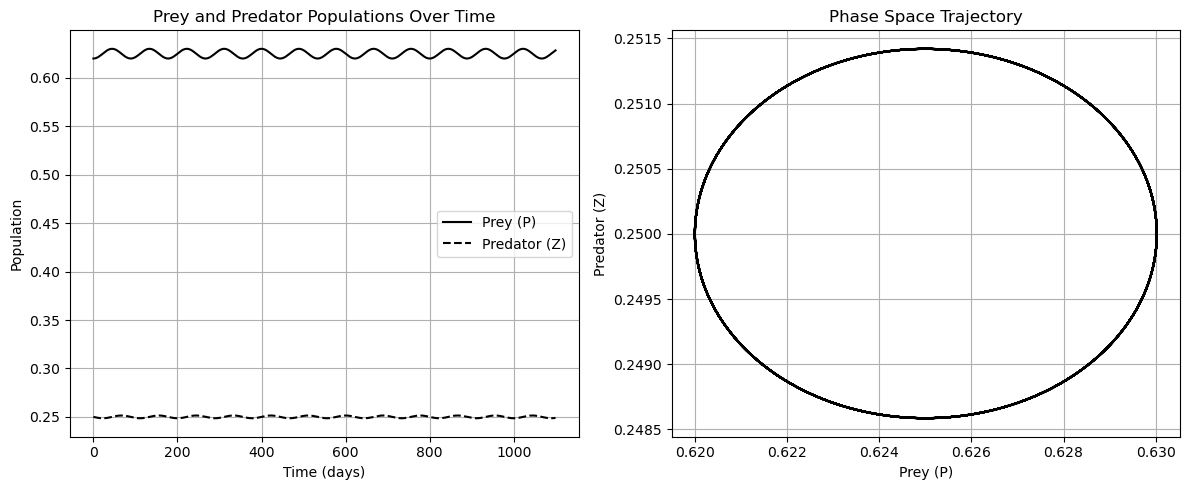

In [25]:
# Define the Lotka-Volterra model equations

def LV_model(x, t, p):
    X1, X2 = x
    p1, p2, p3, p4 = p
    dX1dt = X1 * (p1 - p2 * X2)
    dX2dt = X2 * (p3 * p2 * X1 - p4)
    return np.array([dX1dt, dX2dt])

# Parameters and initial conditions for Figure 9.4

p = np.array([0.1, 0.4, 0.2, 0.05])
X1_0 = 0.62
X2_0 = 0.25
x0 = np.array([X1_0, X2_0])

# Time axis

Tstart = 0.
Tend = 1100.
step = 1  # Adjusted for longer integration time
t = np.arange(Tstart, Tend, step)

# Integration using the scipy ODE solver

y = odeint(LV_model, x0, t, args=(p,))

# Define plot features

figsize = (12, 5)
xlabel = 'Time (days)'
ylabel = 'Population'
titles = ['Prey and Predator Populations Over Time', 'Phase Space Trajectory']
linestyles = ['k-', 'k--']

# Plotting the results

fig, ax = plt.subplots(1, 2, figsize=figsize)


ax[0].plot(t, y[:, 0], linestyles[0], label='Prey (P)')
ax[0].plot(t, y[:, 1], linestyles[1], label='Predator (Z)')
ax[0].set_xlabel(xlabel)
ax[0].set_ylabel(ylabel)
ax[0].set_title(titles[0])
ax[0].legend()
ax[0].grid(True)


ax[1].plot(y[:, 0], y[:, 1], 'k-')
ax[1].set_xlabel('Prey (P)')
ax[1].set_ylabel('Predator (Z)')
ax[1].set_title(titles[1])
ax[1].grid(True)

plt.tight_layout()
plt.show()



4. Do you get the same results? Why not? See the errata in the document Glover_etal_2011_ERRATA.pdf to understand more {no need to fully understand the stability analysis ;)}

The observed outward movement in Fig. 9.4b of the Lotka-Volterra model is due to numerical errors, specifically truncation and roundoff errors. 